In [1]:
import pandas as pd
from scipy import stats as st
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import math

In [2]:
retail_df = pd.read_csv('./Databases/retail_sales_dataset.csv')

In [3]:
retail_df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
print('Duplicated data:', retail_df.duplicated().sum())

Duplicated data: 0


In [6]:
print(retail_df.isna().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [7]:
retail_df.columns = retail_df.columns.str.lower()

retail_df.sample(3)

,transaction id,date,customer id,gender,age,product category,quantity,price per unit,total amount
586,587,2023-06-08,CUST587,Female,40,Beauty,4,300,1200
321,322,2023-01-30,CUST322,Male,51,Electronics,1,500,500
563,564,2023-10-24,CUST564,Male,50,Electronics,2,50,100


In [8]:
column_new ={
    "transaction id": "transaction_id",
    "customer id": "customer_id",
    "product category": "product_category",
    "price per unit": "price_per_unit",
    "total amount": "total_amount"
}

retail_df.rename(columns = column_new, inplace = True)

print(retail_df.columns) 

Index(['transaction_id', 'date', 'customer_id', 'gender', 'age',
       'product_category', 'quantity', 'price_per_unit', 'total_amount'],
      dtype='object')


Tipo de datos a cambiar:
- Columna date

In [9]:
retail_df['date']= pd.to_datetime(retail_df['date'], format = '%Y-%m-%d')

print(retail_df.dtypes)

transaction_id               int64
date                datetime64[ns]
customer_id                 object
gender                      object
age                          int64
product_category            object
quantity                     int64
price_per_unit               int64
total_amount                 int64
dtype: object


In [10]:
retail_df['purchase_month'] = retail_df['date'].dt.month

retail_df['purchase_day'] = retail_df['date'].dt.day

In [11]:
retail_df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,purchase_month,purchase_day
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11,24
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,27
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1,13
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5,21
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5,6


In [12]:
def generation(age):
    
    if age >= 59:
        return 'Baby Boomer'
    elif age >= 42:
        return 'Generación X'
    elif age >= 29:
        return 'Millenial'
    else:
        return 'Centennial'

retail_df['generation'] = retail_df['age'].apply(generation)

## Ventas por edades

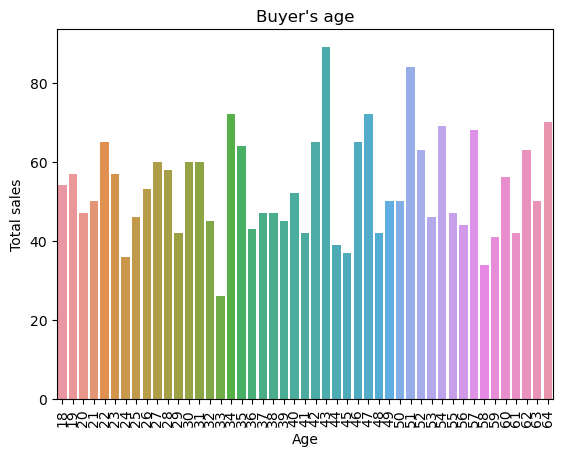

In [13]:
sales_by_age = retail_df.groupby('age')['quantity'].sum().reset_index()

sns.barplot(data = sales_by_age,
             x = 'age',
             y = 'quantity')

plt.title("Buyer's age")
plt.xlabel('Age')
plt.ylabel('Total sales')
plt.xticks(rotation = 90)
plt.show()

## Ventas por generación: 

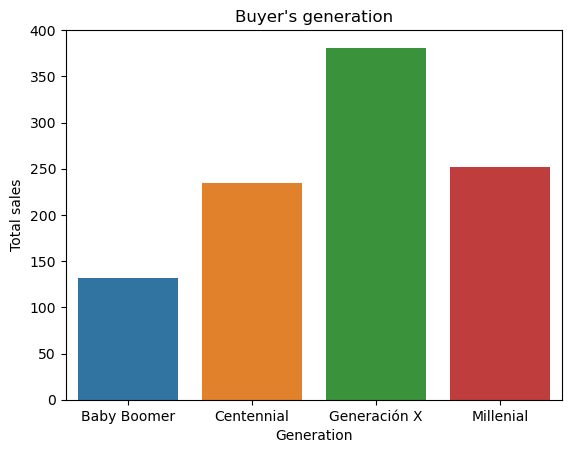

In [14]:
sales_by_generation = retail_df.groupby('generation')['quantity'].count().reset_index()

sns.barplot(data = sales_by_generation,
             x = 'generation',
             y = 'quantity')

plt.title("Buyer's generation")
plt.xlabel('Generation')
plt.ylabel('Total sales')
plt.show()

## Ventas por género: 

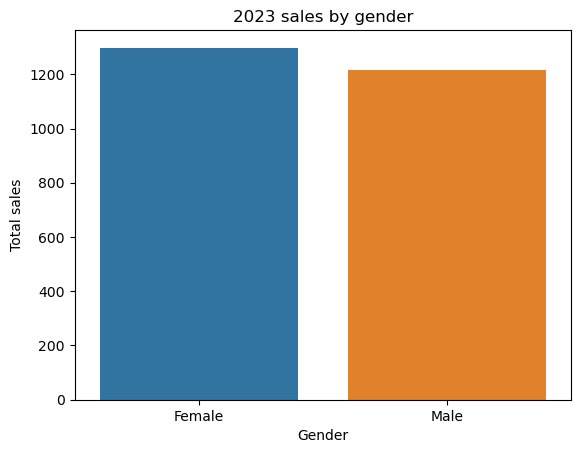

In [15]:
sales_by_gender = retail_df.groupby('gender')['quantity'].sum().reset_index()

sns.barplot(data = sales_by_gender,
             x = 'gender',
             y = 'quantity')

plt.title('2023 sales by gender')
plt.xlabel('Gender')
plt.ylabel('Total sales')
plt.show()

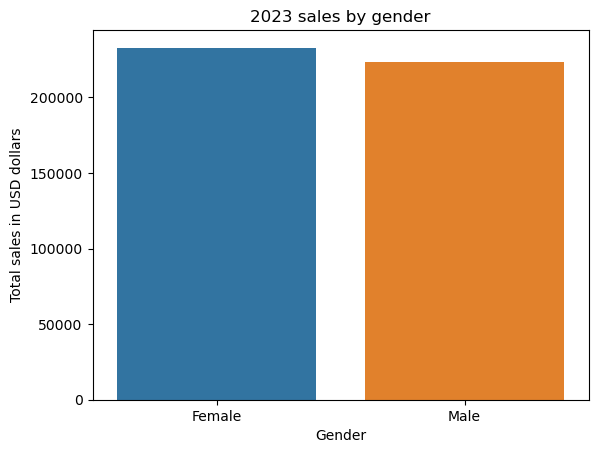

In [25]:
earnings_by_gender = retail_df.groupby('gender')['total_amount'].sum().reset_index()

sns.barplot(data = earnings_by_gender,
             x = 'gender',
             y = 'total_amount')

plt.title('2023 sales by gender')
plt.xlabel('Gender')
plt.ylabel('Total sales in USD dollars')
plt.show()

## Ventas por mes:

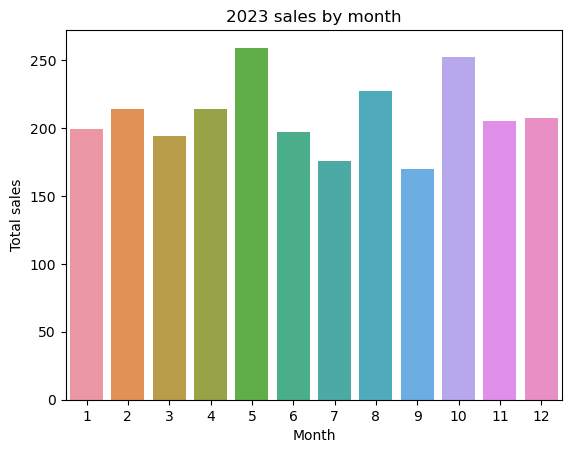

In [16]:
sales_by_month = retail_df.groupby('purchase_month')['quantity'].sum().reset_index()

sns.barplot(data = sales_by_month,
             x = 'purchase_month',
             y = 'quantity')

plt.title('2023 sales by month')
plt.xlabel('Month')
plt.ylabel('Total sales')
plt.show()

In [17]:
df_centennials = retail_df[retail_df['generation'] == 'Centennial'].reset_index(drop = True)

df_centennials.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,purchase_month,purchase_day,generation
0,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,27,Centennial
1,11,2023-02-14,CUST011,Male,23,Clothing,2,50,100,2,14,Centennial
2,13,2023-08-05,CUST013,Male,22,Electronics,3,500,1500,8,5,Centennial
3,16,2023-02-17,CUST016,Male,19,Clothing,3,500,1500,2,17,Centennial
4,17,2023-04-22,CUST017,Female,27,Clothing,4,25,100,4,22,Centennial


In [18]:
df_centennials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    235 non-null    int64         
 1   date              235 non-null    datetime64[ns]
 2   customer_id       235 non-null    object        
 3   gender            235 non-null    object        
 4   age               235 non-null    int64         
 5   product_category  235 non-null    object        
 6   quantity          235 non-null    int64         
 7   price_per_unit    235 non-null    int64         
 8   total_amount      235 non-null    int64         
 9   purchase_month    235 non-null    int32         
 10  purchase_day      235 non-null    int32         
 11  generation        235 non-null    object        
dtypes: datetime64[ns](1), int32(2), int64(5), object(4)
memory usage: 20.3+ KB


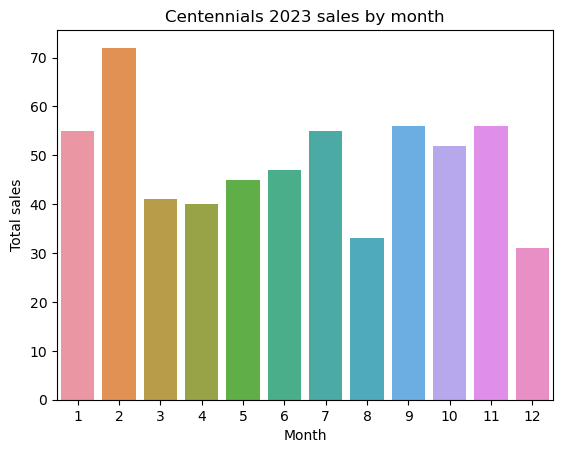

In [19]:
sales_by_month_cen = df_centennials.groupby('purchase_month')['quantity'].sum().reset_index()

sns.barplot(data = sales_by_month_cen,
             x = 'purchase_month',
             y = 'quantity')

plt.title('Centennials 2023 sales by month')
plt.xlabel('Month')
plt.ylabel('Total sales')
plt.show()

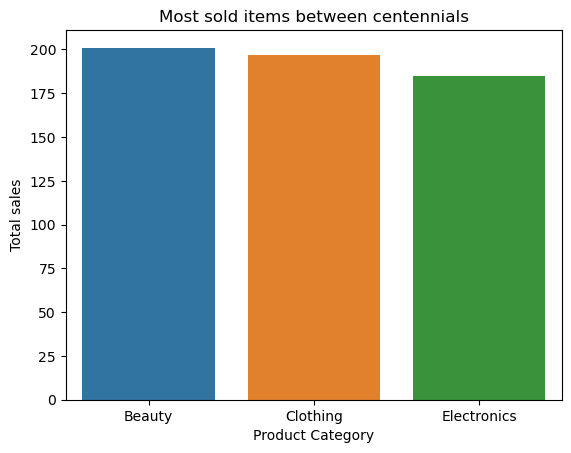

In [20]:
fav_categories_cen = df_centennials.groupby('product_category')['quantity'].sum().reset_index()

sns.barplot(data = fav_categories_cen,
             x = 'product_category',
             y = 'quantity')

plt.title('Most sold items between centennials')
plt.xlabel('Product Category')
plt.ylabel('Total sales')
plt.show()

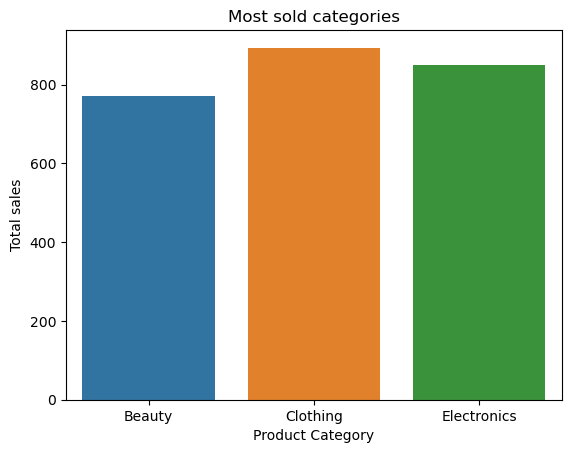

In [21]:
fav_categories = retail_df.groupby('product_category')['quantity'].sum().reset_index()

sns.barplot(data = fav_categories,
             x = 'product_category',
             y = 'quantity')

plt.title('Most sold categories')
plt.xlabel('Product Category')
plt.ylabel('Total sales')
plt.show()

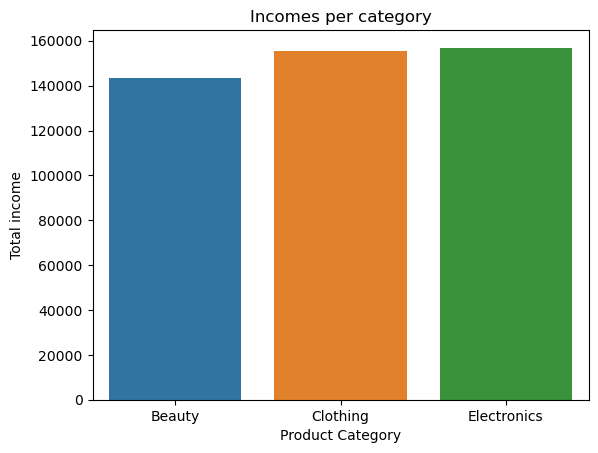

In [22]:
income_categories = retail_df.groupby('product_category')['total_amount'].sum().reset_index()

sns.barplot(data = income_categories,
             x = 'product_category',
             y = 'total_amount')

plt.title('Incomes per category')
plt.xlabel('Product Category')
plt.ylabel('Total income')
plt.show()

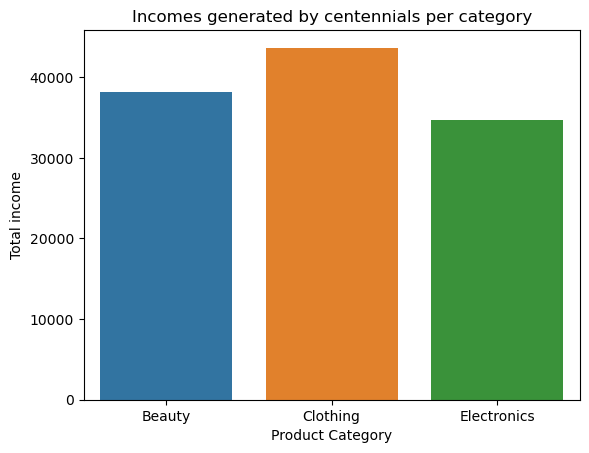

In [26]:
income_categories_cen = df_centennials.groupby('product_category')['total_amount'].sum().reset_index()

sns.barplot(data = income_categories_cen,
             x = 'product_category',
             y = 'total_amount')

plt.title('Incomes generated by centennials per category')
plt.xlabel('Product Category')
plt.ylabel('Total income')
plt.show()

## Conclusiones:

- La Generación X es la que más compró durante el 2023. Seguida por los Millenial, Centennial y por último los Baby Boomers.
- Las mujeres son quienes más bienes adquieren y generan mayores ingresos para el sector retail.
- Para los clientes en general, los mejores meses en ventas fueron mayo, octubre y agosto, respectivamente.
- En cuanto a los centennial, los meses donde más compraron fueron: febrero, septiembre y noviembre.
- Entre los clientes en general, los artículos más vendidos en la industria son los que pertenecen a la categoría de ropa, seguido por electrónicos y por último belleza. Sin embargo, para los centennials, la categoría de la cual se compran más artículos es belleza.
- Más allá de las conclusiones del punto anterior, es relevante mencionar que la industria del retail recibe más ganancias de la categoría de electrónicos, seguido por ropa y por último belleza. En el caso de las ganacias proveninetes de las compras realizadas por centennials, la categoría que más ingresos representa para la industria retail es ropa, seguida por belleza y, por último, tecnología. 